In [57]:
import spacy
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load spaCy English model
nlp = spacy.load('en_core_web_sm')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vuong\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vuong\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vuong\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [58]:
# Step 1: Sentence Segmentation
#text = "Today is a beautiful day, i am going to the park and play football. Then, I will go to the shop and buy some food"
text = """<p id="original-text">
Welcome to the world of Natural Language Processing (NLP)! 
This paragraph delves into the fascinating realm of text analysis, where we'll unravel the magic behind understanding & manipulating human language. Let's embark on a journey through an NLP pipeline, transforming raw text into structured insights. We'll encounter challenges like contractions (e.g., "can't," "wouldn't"), possessives ("Mary's cat," "the company's profits"), hyphenated words ("state-of-the-art," "well-being"), and even emoticons (:-), 😉). Punctuation marks like commas, semicolons (;), and exclamation points (!) will also play a role. Brace yourselves for a captivating exploration of how machines decipher the intricacies of human communication! 
</p>"""
doc = nlp(text)
print(doc)
sentences = [sent.text for sent in doc.sents]
print("After segmentation:")
for sent in sentences:
    print(sent)


<p id="original-text">
Welcome to the world of Natural Language Processing (NLP)! 
This paragraph delves into the fascinating realm of text analysis, where we'll unravel the magic behind understanding & manipulating human language. Let's embark on a journey through an NLP pipeline, transforming raw text into structured insights. We'll encounter challenges like contractions (e.g., "can't," "wouldn't"), possessives ("Mary's cat," "the company's profits"), hyphenated words ("state-of-the-art," "well-being"), and even emoticons (:-), 😉). Punctuation marks like commas, semicolons (;), and exclamation points (!) will also play a role. Brace yourselves for a captivating exploration of how machines decipher the intricacies of human communication! 
</p>
After segmentation:
<p id="original-text">
Welcome to the world of Natural Language Processing (NLP)! 

This paragraph delves into the fascinating realm of text analysis, where we'll unravel the magic behind understanding & manipulating human la

In [59]:
# Step 2: Tokenization
tokens = [token.text for token in doc]
print('After tokenization:')
print(tokens)



After tokenization:
['<', 'p', 'id="original', '-', 'text', '"', '>', '\n', 'Welcome', 'to', 'the', 'world', 'of', 'Natural', 'Language', 'Processing', '(', 'NLP', ')', '!', '\n', 'This', 'paragraph', 'delves', 'into', 'the', 'fascinating', 'realm', 'of', 'text', 'analysis', ',', 'where', 'we', "'ll", 'unravel', 'the', 'magic', 'behind', 'understanding', '&', 'manipulating', 'human', 'language', '.', 'Let', "'s", 'embark', 'on', 'a', 'journey', 'through', 'an', 'NLP', 'pipeline', ',', 'transforming', 'raw', 'text', 'into', 'structured', 'insights', '.', 'We', "'ll", 'encounter', 'challenges', 'like', 'contractions', '(', 'e.g.', ',', '"', 'ca', "n't", ',', '"', '"', 'would', "n't", '"', ')', ',', 'possessives', '(', '"', 'Mary', "'s", 'cat', ',', '"', '"', 'the', 'company', "'s", 'profits', '"', ')', ',', 'hyphenated', 'words', '(', '"', 'state', '-', 'of', '-', 'the', '-', 'art', ',', '"', '"', 'well', '-', 'being', '"', ')', ',', 'and', 'even', 'emoticons', '(', ':-)', ',', '😉', ')',

In [60]:
# Step 3: Text normalization
normalized_tokens = [token.lower() for token in tokens]
print("After normalization (lowering):")
print(normalized_tokens)


After normalization (lowering):
['<', 'p', 'id="original', '-', 'text', '"', '>', '\n', 'welcome', 'to', 'the', 'world', 'of', 'natural', 'language', 'processing', '(', 'nlp', ')', '!', '\n', 'this', 'paragraph', 'delves', 'into', 'the', 'fascinating', 'realm', 'of', 'text', 'analysis', ',', 'where', 'we', "'ll", 'unravel', 'the', 'magic', 'behind', 'understanding', '&', 'manipulating', 'human', 'language', '.', 'let', "'s", 'embark', 'on', 'a', 'journey', 'through', 'an', 'nlp', 'pipeline', ',', 'transforming', 'raw', 'text', 'into', 'structured', 'insights', '.', 'we', "'ll", 'encounter', 'challenges', 'like', 'contractions', '(', 'e.g.', ',', '"', 'ca', "n't", ',', '"', '"', 'would', "n't", '"', ')', ',', 'possessives', '(', '"', 'mary', "'s", 'cat', ',', '"', '"', 'the', 'company', "'s", 'profits', '"', ')', ',', 'hyphenated', 'words', '(', '"', 'state', '-', 'of', '-', 'the', '-', 'art', ',', '"', '"', 'well', '-', 'being', '"', ')', ',', 'and', 'even', 'emoticons', '(', ':-)', ',

In [61]:
# Step 4: Stopwords removal
stop_words = set(stopwords.words('english'))
filtered_tokens = [token for token in normalized_tokens if token not in stop_words]
print("After stopwords removal:")
print(filtered_tokens)


After stopwords removal:
['<', 'p', 'id="original', '-', 'text', '"', '>', '\n', 'welcome', 'world', 'natural', 'language', 'processing', '(', 'nlp', ')', '!', '\n', 'paragraph', 'delves', 'fascinating', 'realm', 'text', 'analysis', ',', "'ll", 'unravel', 'magic', 'behind', 'understanding', '&', 'manipulating', 'human', 'language', '.', 'let', "'s", 'embark', 'journey', 'nlp', 'pipeline', ',', 'transforming', 'raw', 'text', 'structured', 'insights', '.', "'ll", 'encounter', 'challenges', 'like', 'contractions', '(', 'e.g.', ',', '"', 'ca', "n't", ',', '"', '"', 'would', "n't", '"', ')', ',', 'possessives', '(', '"', 'mary', "'s", 'cat', ',', '"', '"', 'company', "'s", 'profits', '"', ')', ',', 'hyphenated', 'words', '(', '"', 'state', '-', '-', '-', 'art', ',', '"', '"', 'well', '-', '"', ')', ',', 'even', 'emoticons', '(', ':-)', ',', '😉', ')', '.', 'punctuation', 'marks', 'like', 'commas', ',', 'semicolons', '(', ';)', ',', 'exclamation', 'points', '(', '!', ')', 'also', 'play', 'rol

In [62]:
# Step 5: Text cleaning
translator = str.maketrans('', '', string.punctuation)

cleaned_tokens = [token.translate(translator) for token in filtered_tokens]
print("After text cleaning:")
print(cleaned_tokens)


After text cleaning:
['', 'p', 'idoriginal', '', 'text', '', '', '\n', 'welcome', 'world', 'natural', 'language', 'processing', '', 'nlp', '', '', '\n', 'paragraph', 'delves', 'fascinating', 'realm', 'text', 'analysis', '', 'll', 'unravel', 'magic', 'behind', 'understanding', '', 'manipulating', 'human', 'language', '', 'let', 's', 'embark', 'journey', 'nlp', 'pipeline', '', 'transforming', 'raw', 'text', 'structured', 'insights', '', 'll', 'encounter', 'challenges', 'like', 'contractions', '', 'eg', '', '', 'ca', 'nt', '', '', '', 'would', 'nt', '', '', '', 'possessives', '', '', 'mary', 's', 'cat', '', '', '', 'company', 's', 'profits', '', '', '', 'hyphenated', 'words', '', '', 'state', '', '', '', 'art', '', '', '', 'well', '', '', '', '', 'even', 'emoticons', '', '', '', '😉', '', '', 'punctuation', 'marks', 'like', 'commas', '', 'semicolons', '', '', '', 'exclamation', 'points', '', '', '', 'also', 'play', 'role', '', 'brace', 'captivating', 'exploration', 'machines', 'decipher', 

In [63]:
# Step 6: Stemming and Lemmatization
stemer = PorterStemmer()    
stemmed_tokens = [stemer.stem(token) for token in cleaned_tokens]
print("After stemming:")
print(stemmed_tokens)

lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in stemmed_tokens]
print("After lemmatization:")
print(lemmatized_tokens)


After stemming:
['', 'p', 'idorigin', '', 'text', '', '', '\n', 'welcom', 'world', 'natur', 'languag', 'process', '', 'nlp', '', '', '\n', 'paragraph', 'delv', 'fascin', 'realm', 'text', 'analysi', '', 'll', 'unravel', 'magic', 'behind', 'understand', '', 'manipul', 'human', 'languag', '', 'let', 's', 'embark', 'journey', 'nlp', 'pipelin', '', 'transform', 'raw', 'text', 'structur', 'insight', '', 'll', 'encount', 'challeng', 'like', 'contract', '', 'eg', '', '', 'ca', 'nt', '', '', '', 'would', 'nt', '', '', '', 'possess', '', '', 'mari', 's', 'cat', '', '', '', 'compani', 's', 'profit', '', '', '', 'hyphen', 'word', '', '', 'state', '', '', '', 'art', '', '', '', 'well', '', '', '', '', 'even', 'emoticon', '', '', '', '😉', '', '', 'punctuat', 'mark', 'like', 'comma', '', 'semicolon', '', '', '', 'exclam', 'point', '', '', '', 'also', 'play', 'role', '', 'brace', 'captiv', 'explor', 'machin', 'deciph', 'intricaci', 'human', 'commun', '', '\n', '', 'p', '']
After lemmatization:
['', 'p

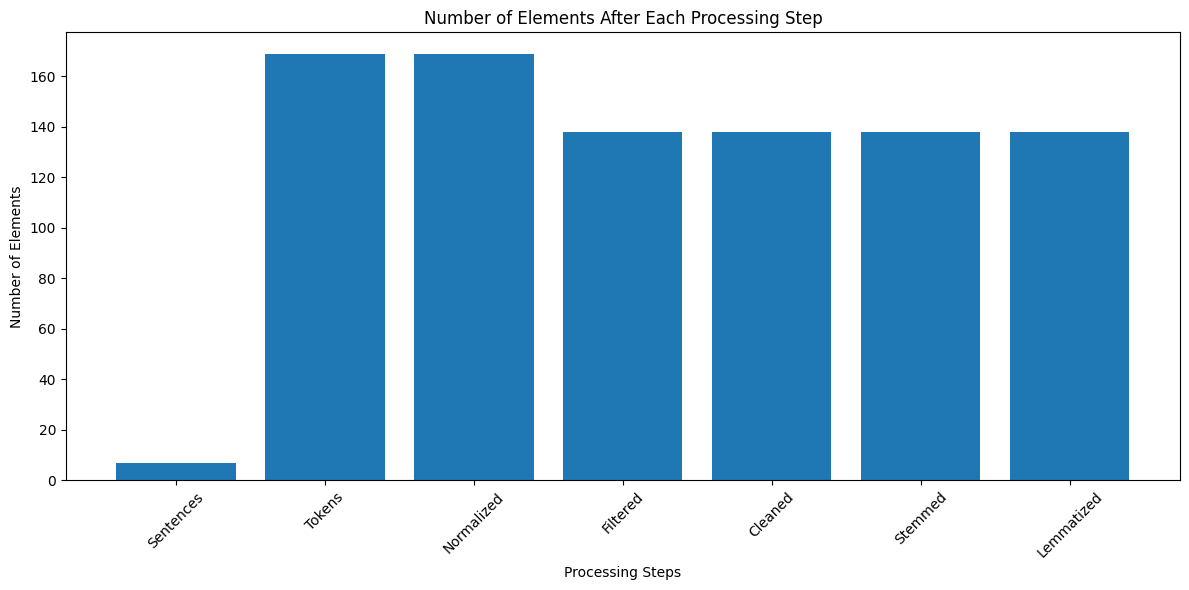

Sentences: 7
Tokens: 169
Normalized: 169
Filtered: 138
Cleaned: 138
Stemmed: 138
Lemmatized: 138


In [64]:
# Number of elements in list
import matplotlib.pyplot as plt

steps = ['Sentences', 'Tokens', 'Normalized', 'Filtered', 'Cleaned', 'Stemmed', 'Lemmatized']
counts = [len(sentences), len(tokens), len(normalized_tokens), len(filtered_tokens), 
          len(cleaned_tokens), len(stemmed_tokens), len(lemmatized_tokens)]

plt.figure(figsize=(12, 6))
plt.bar(steps, counts)
plt.title('Number of Elements After Each Processing Step')
plt.xlabel('Processing Steps')
plt.ylabel('Number of Elements')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the counts for reference
for step, count in zip(steps, counts):
    print(f"{step}: {count}")
